# $\chi^2$-test

I test statistici $\chi^2$ coinvolgono una distribuzione di probabilità $\chi^2$. Il test chi può essere usato per verificare che le frequenze dell'osservazione di un fenomeno non si discostino troppo dalle frequenze attese

- in altre parole, può essere usato per confrontare la distribuzione di probabilità ricavabile dal campione con una distribuzione di probabilità attesa.
- ...

In [1]:
%reset -f

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt


Chi^2-test. scipy.stats.chisquare
Power_divergenceResult(statistic=array([0.18693428, 0.00899006]), pvalue=array([0.99924809, 0.99999959]))
 statistics: [0.18693428 0.00899006]
 pvalue    : [0.99924809 0.99999959]

Chi^2-test, self-implemented
 chi2      : [0.18693428 0.00899006]


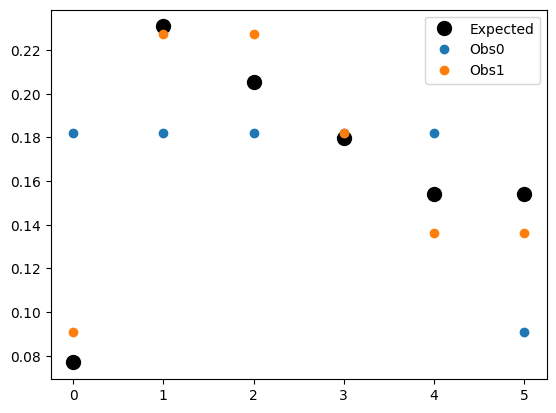

In [2]:
#
x = np.arange(6)

#> Comparison between expected distribution under H0 and sample
# N. of expected and registered events
f_h0 = np.array([ 6, 18, 16, 14, 12, 12 ], dtype=float)
f_s  = np.array([[16, 16, 16, 16, 16, 8], [8, 20, 20, 16, 12, 12]], dtype=float)

n_o, n_s = len(f_h0), np.shape(f_s)[0]

# Scaling
sum_factor = 1.
if ( True ):
    f_h0 = f_h0 / np.sum(f_h0) * sum_factor
    for i in np.arange(n_s):
         f_s[i,:] = f_s[i,:] / np.sum(f_s[i,:]) * sum_factor

res = sp.stats.chisquare(f_s, f_exp=f_h0, axis=1)

print(f"\nChi^2-test. scipy.stats.chisquare")
print(res)
print(f" statistics: {res.statistic}")
print(f" pvalue    : {res.pvalue}")

# w/o using scipy function
err = [ [ (f_h0[i_o] - f_s[i_s,i_o])**2/f_h0[i_o] for i_o in np.arange(n_o) ] for i_s in np.arange(n_s) ]
chi2 = np.sum(err,axis=1)
# ...
print("\nChi^2-test, self-implemented")
print(f" chi2      : {chi2}")

plt.figure()
plt.plot(x,f_h0, 'o', color='black', label='Expected', markersize=10)
for i_s in np.arange(n_s):
    plt.plot(x, f_s[i_s,:], 'o', label=f"Obs{i_s}")
plt.legend()